### Merge
for more information check out this helpful link http://www.datacarpentry.org/python-ecology-lesson/04-merging-data/

* Store products information in 'prd' variable
* Store Sales information in 'sls' variable
* Inner, outer, Left, Right

In [324]:
prd = pd.read_sql_query('select * from products', conn)
sls = pd.read_sql_query('select * from sales limit 1000', conn)

In [347]:
# Only include observations found in both prd and sls: Inner Join
pd.merge(prd, sls, left_on='item_no',right_on='item')


,item_no,category_name_x,item_description,vendor_x,vendor_name,bottle_size,pack_x,inner_pack,age,proof,...,vendor_no,vendor_y,item,description,pack_y,liter_size,state_btl_cost,btl_price,bottle_qty,total
0,904616,MISC. AMERICAN CORDIALS & LIQUEURS,Travis Hasse Apple Pie,305,Mhw Ltd,750,12,1,None,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,904617,MISC. IMPORTED CORDIALS & LIQUEURS,D'aristi Xtabentun,391,Anchor Distilling (preiss Imports),750,12,1,None,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,904618,PEACH BRANDIES,Hiram Walker Peach Brandy,370,Pernod Ricard Usa/austin Nichols,1000,12,1,None,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,904619,SCOTCH WHISKIES,Oak Cross Whisky,305,Mhw Ltd,750,6,1,None,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,904620,FLAVORED VODKA,Uv Red(cherry) Vodka,380,Phillips Beverage Company,200,24,1,None,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,904621,STRAIGHT BOURBON WHISKIES,Heaven Hill Old Style White Label,259,Heaven Hill Distilleries Inc.,750,12,1,None,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,904622,MISC. AMERICAN CORDIALS & LIQUEURS,Hyde Herbal Liqueur,194,Fire Tail Brands Llc,750,12,1,None,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,904623,MISCELLANEOUS BRANDIES,Dupont Calvados Fine Reserve,403,Robert Kacher Selections,750,12,1,None,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,904624,IMPORTED VODKA,Sobieski Cytron Vodka,267,Imperial Brands Inc.,750,12,1,None,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,904625,FLAVORED RUM,Captain Morgan Parrot Bay Strawberry,260,Diageo Americas,750,12,1,None,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [351]:
# Only include observations from left side regardless of a match on the right side
lf=pd.merge(prd, sls, left_on='item_no',right_on='item', how='right')

In [353]:
lf[ pd.isnull(lf.item) ]

,item_no,category_name_x,item_description,vendor_x,vendor_name,bottle_size,pack_x,inner_pack,age,proof,...,vendor_no,vendor_y,item,description,pack_y,liter_size,state_btl_cost,btl_price,bottle_qty,total


As with most things covered in this crash course this is just the tip of the iceberg but it should
get you up and running with data.


In [ ]:
#### Intro to visualiazation from Pandas
* Bar plot
* Stacked Bar plots
* Box plot
* Histogram
* Add title and labels
* Scatter plot
* Add Transparency
* Vary point by Color

In [357]:
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# count the number of items in each category
prd.category_name.value_counts()



DECANTERS & SPECIALTY PACKAGES         True
IMPORTED ALE                           True
FLAVORED VODKA                         True
MISC. IMPORTED CORDIALS & LIQUEURS     True
TEQUILA                                True
IMPORTED VODKA                        False
SCOTCH WHISKIES                       False
AMERICAN COCKTAILS                    False
SINGLE MALT SCOTCH                    False
STRAIGHT BOURBON WHISKIES             False
FLAVORED RUM                          False
IMPORTED VODKA - MISC                 False
CANADIAN WHISKIES                     False
MISC. AMERICAN CORDIALS & LIQUEURS    False
IMPORTED GRAPE BRANDIES               False
80 PROOF VODKA                        False
PUERTO RICO & VIRGIN ISLANDS RUM      False
CREAM LIQUEURS                        False
BLENDED WHISKIES                      False
AMERICAN DRY GINS                     False
IRISH WHISKIES                        False
MISCELLANEOUS SCHNAPPS                False
DISTILLED SPIRITS SPECIALTY     

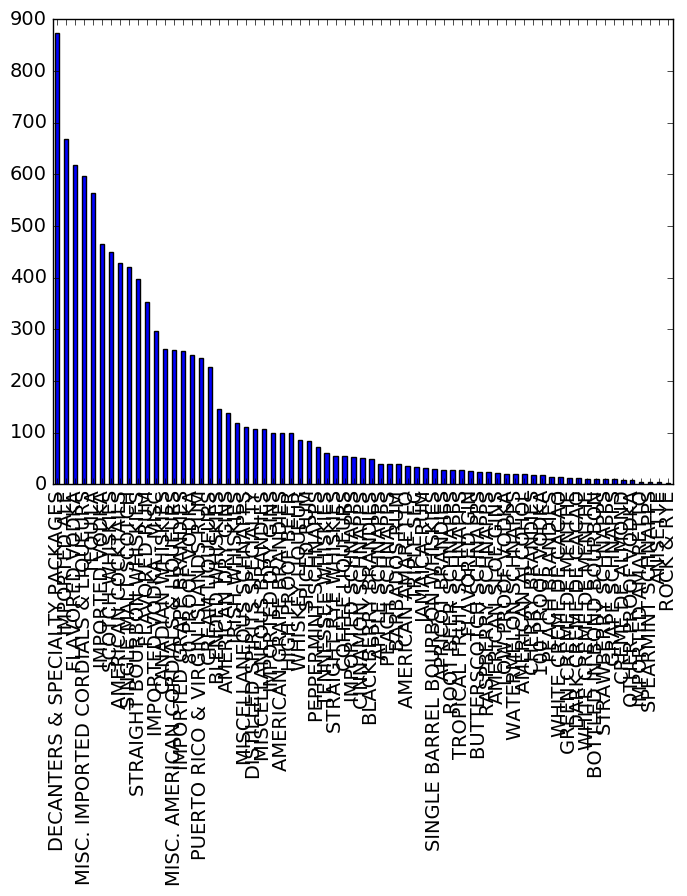

In [356]:
# compare with bar plot
prd.category_name.value_counts().plot(kind='bar')

In [ ]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()


# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')


# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')


# stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)



# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas